# OpenCV
    - a library commonly used for Computer Vision Tasks.
    - Can be used for Image Processing.
    
### Installation
`pip install opencv-python`



In [9]:
%config Completer.use_jedi=False

### Import Library
`import cv2`

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading and Displaying Images

In [3]:
img = cv2.imread("./dog.jpg")

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(2820, 3760, 3)

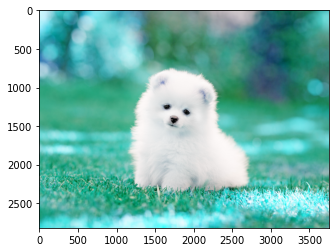

In [6]:
%matplotlib inline

plt.imshow(img)
plt.show()

In [7]:
# cv2.imshow("Dog image", img)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

### Changing ColorSpaces

In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
img_rgb.shape

(2820, 3760, 3)

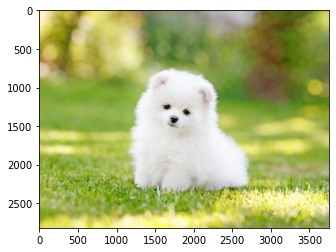

In [10]:
plt.imshow(img_rgb)
plt.show()

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
img_gray.shape

(2820, 3760)

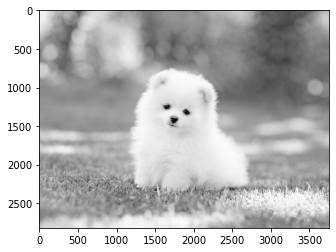

In [13]:
plt.imshow(img_gray, cmap="gray")

In [14]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

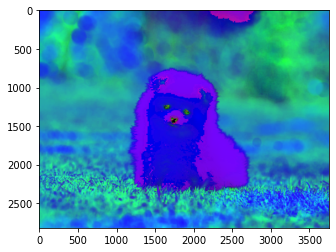

In [15]:
plt.imshow(img_hsv)

### Image Resizing

In [16]:
img_rgb.shape

(2820, 3760, 3)

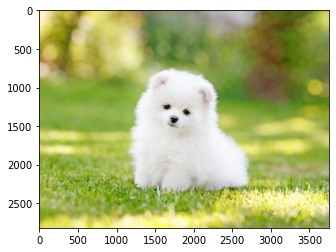

In [17]:
plt.imshow(img_rgb)

In [18]:
img_new = cv2.resize(img_rgb, (500,500))

In [19]:
img_new.shape

(500, 500, 3)

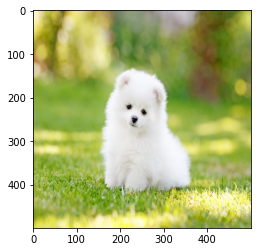

In [20]:
plt.imshow(img_new)

### Blur

In [21]:
img_blur = cv2.blur(img_new, (10,10))

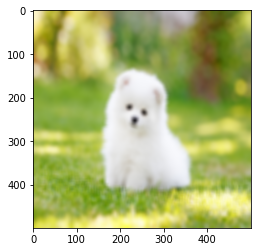

In [22]:
plt.imshow(img_blur)

### Image Rotation

In [15]:
img_rgb.shape

(2820, 3760, 3)

In [16]:
rows, cols = img_rgb.shape[:-1]

In [26]:
# images are rotated around the centre
# by default the rotation is anticlockwise. to do clockwise specify negative sign
M = cv2.getRotationMatrix2D((rows/2, cols/2), -10, 1)

In [27]:
i = cv2.warpAffine(img_rgb, M, (cols, rows) )

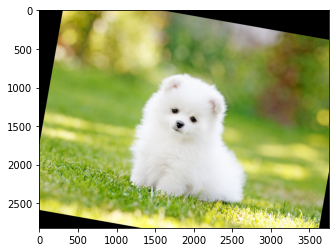

In [28]:
plt.imshow(i)

### Image Translation

In [28]:
M = np.float32([[1,0.1,-50], [0, 1, -200]])

In [29]:
M

array([[ 1.e+00,  1.e-01, -5.e+01],
       [ 0.e+00,  1.e+00, -2.e+02]], dtype=float32)

In [30]:
i = cv2.warpAffine(img_rgb, M, (cols, rows))

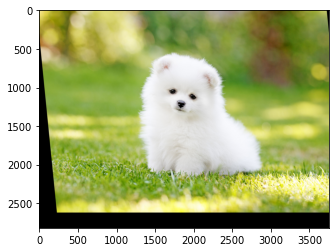

In [31]:
plt.imshow(i)

### Edge Detection
 - Canny Edge Detection

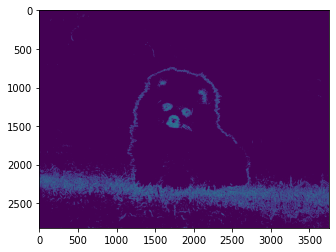

In [32]:
i = cv2.Canny(img_rgb, 45, 45)
plt.imshow(i)

## Get Video From Camera

In [ ]:
# Actuall videos are also collection/sequence  of images where the sequence of images are
# perceived by our brain as a single continuos video.

In [ ]:
# cv2.waitKey(0)->it will show a frame for infinite time untill any key is presed
# cv2.waitKey(1)->it will show a frame for 1 msec and after that the frame wil be changed
# and before 1 msec if the key gets preseed then as well the frame gets changed .

In [2]:
import cv2

In [ ]:
cam = cv2.VideoCapture(0) #default camera of the system 

while True:
    ret, frame =  cam.read()
    
    if ret == False:
        continue
        
    cv2.imshow("My frame", frame)
    
    # waiting for user to pressed a key
    # if user presses 'q' then terminate
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

    
cam.release()
cv2.destroyAllWindows()

## Face Detection 

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = plt.imread("./group-photo.jpg")

In [3]:
img.shape

(500, 700, 3)

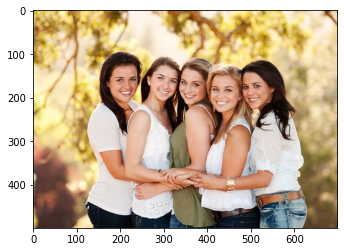

In [4]:
plt.imshow(img)

In [ ]:
#haarcascade_frontalface_default.xml is developed by opencv. Actually it stores the output
# of a machine learning model that has been trained over 100 thouand images.

In [5]:
# template of a face. it will howeer over all the imagae and serach  for the front face (sliding window opertion)
detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [6]:
all_faces = detector.detectMultiScale(img, 1.3, 5)

In [7]:
all_faces.shape

(5, 4)

In [8]:
# [x,y,w,h]
all_faces

array([[172, 131,  80,  80],
       [269, 131,  75,  75],
       [326, 142,  71,  71],
       [469, 147,  75,  75],
       [396, 152,  80,  80]], dtype=int32)

In [42]:
x,y,w,h = all_faces[0]

In [43]:
img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

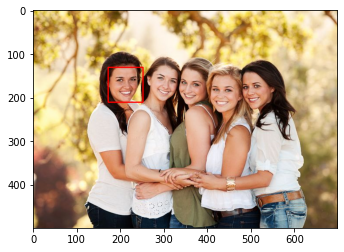

In [44]:
plt.imshow(img)

In [45]:
#  plotting rectangles for all faces
for face in all_faces:
    x,y,w,h = face
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

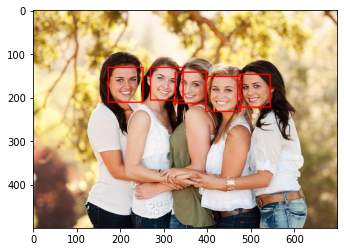

In [46]:
plt.imshow(img)

### Face Detection in Real Time

In [1]:
import cv2

In [2]:
detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [3]:
cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    
    if ret == False:
        continue
        
    all_faces = detector.detectMultiScale(frame, 1.5, 5)
    
    for face in all_faces:
        x,y,w,h = face
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # this will show the frame
    cv2.imshow("Face Detection", frame)
    
    # finding which key you've pressed
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
    
    
cam.release()
cv2.destroyAllWindows()